In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

# Configuration pour des graphiques propres dans le Notebook
%matplotlib inline
plt.style.use('seaborn-v0_8-muted') # Style propre pour GitHub

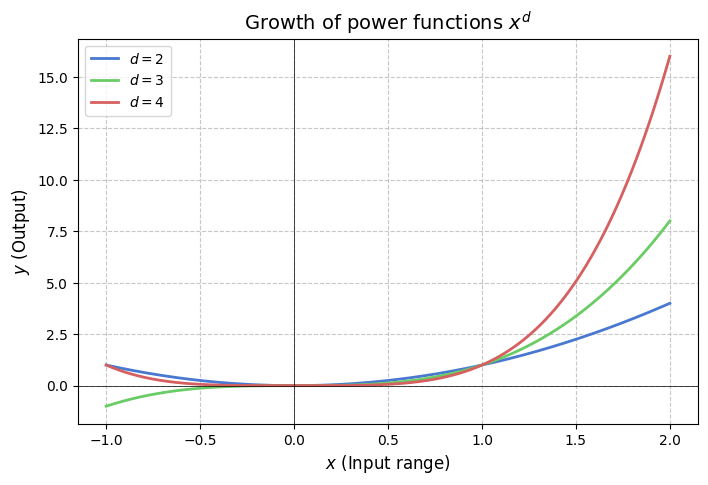

In [26]:
# Configuration des données
n = 10_000
x = np.linspace(-1, 2, n)
list_d = [2, 3, 4]

# Stockage des données dans un dictionnaire (Approche propre PEP8)
dict_y = {d: x**d for d in list_d}

# Création du graphique
plt.figure(figsize=(8, 5))

for d in list_d:
    plt.plot(x, dict_y[d], label=f"$d = {d}$", linewidth=2)

# Habillage professionnel
plt.title("Growth of power functions $x^d$", fontsize=14)
plt.xlabel("$x$ (Input range)", fontsize=12)
plt.ylabel("$y$ (Output)", fontsize=12)
plt.axhline(0, color='black', linewidth=0.5) # Ligne horizonale y=0
plt.axvline(0, color='black', linewidth=0.5) # Ligne verticale x=0
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [28]:
# Chargement du dataset local 
df_taxi = pd.read_csv(
    "nyc_taxi.csv", 
    parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"]
)

# Extraction temporelle pour l'analyse
df_taxi['hour'] = df_taxi['tpep_pickup_datetime'].dt.hour
df_taxi['day'] = df_taxi['tpep_pickup_datetime'].dt.day
df_taxi['day_name'] = df_taxi['tpep_pickup_datetime'].dt.day_name()

# Tri des jours pour un affichage logique
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [33]:
# Agrégation : Nombre de trajets par jour et par heure
taxi_counts = df_taxi.groupby(['day_name', 'hour']).size().reset_index(name='counts')

# Graphique interactif
fig1 = px.line(
    taxi_counts, 
    x="hour", 
    y="counts", 
    color="day_name",
    category_orders={"day_name": days_order},
    title="NYC Taxi Activity: Hourly Patterns by Day",
    labels={'counts': 'Number of Trips', 'hour': 'Hour of Day'}
)
fig1.show()

In [ ]:
# Calcul de la moyenne du prix par jour
taxi_fare_daily = df_taxi.groupby('day')['fare_amount'].mean().reset_index()

# Création de l'animation
fig_anim = px.scatter(
    taxi_fare_daily, 
    x="day", 
    y="fare_amount", 
    animation_frame="day",
    size=[20]*len(taxi_fare_daily),
    range_x=[0, 32], 
    range_y=[taxi_fare_daily['fare_amount'].min() - 2, taxi_fare_daily['fare_amount'].max() + 2],
    title="Animation: Evolution of Average Fare Amount through the Month"
)



fig_anim.show()

Chargement de la consommation électrique...
Chargement des données météo...


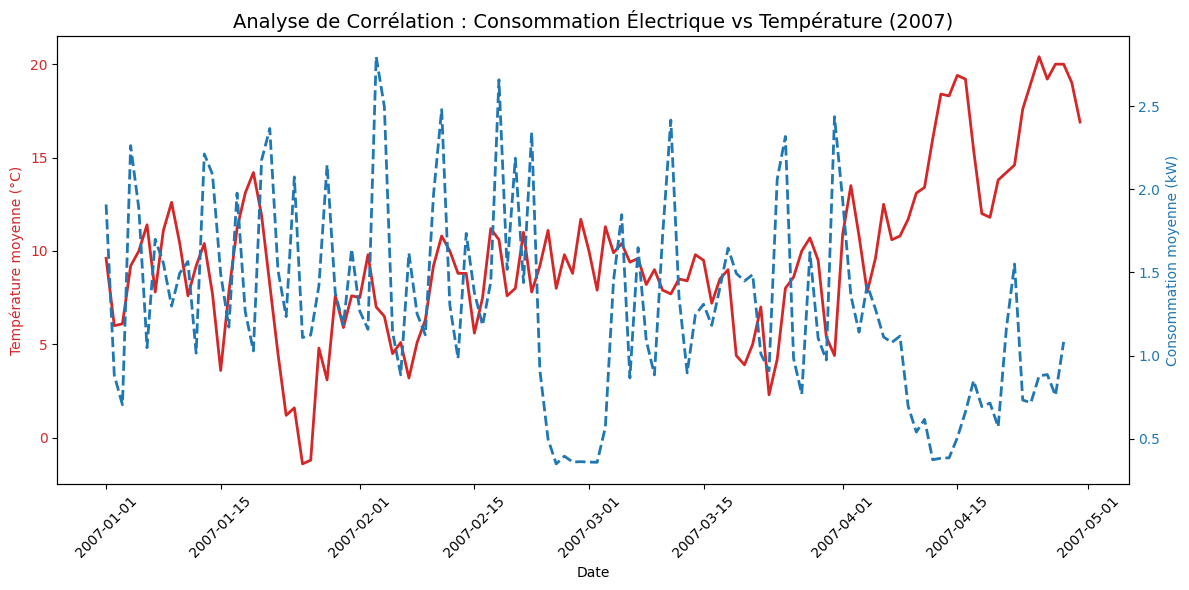

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. CHARGEMENT ET NETTOYAGE DE LA CONSOMMATION ÉLECTRIQUE ---
print("Chargement de la consommation électrique...")
fields = ['Date', 'Time', 'Global_active_power']
df_power = pd.read_csv(
    'household_power_consumption.txt',
    sep=';',
    nrows=200_000,
    na_values=['?', ''],
    usecols=fields
)

# Suppression des valeurs manquantes et création de l'index temporel
df_power.dropna(inplace=True)
df_power["DateTime"] = pd.to_datetime(df_power['Date'] + " " + df_power["Time"], format="%d/%m/%Y %H:%M:%S")
df_power.set_index("DateTime", inplace=True)

# --- 2. CHARGEMENT ET NETTOYAGE DE LA TEMPÉRATURE ---
print("Chargement des données météo...")
df_temp = pd.read_csv("TG_STAID011249.txt", comment="#", delimiter=",", skipinitialspace=True)
df_temp.columns = df_temp.columns.str.strip()
df_temp = df_temp[["DATE", "TG"]]

# Conversion date, gestion des -9999 et conversion Celsius
df_temp["DATE"] = pd.to_datetime(df_temp["DATE"], format='%Y%m%d')
df_temp.loc[df_temp["TG"] == -9999, "TG"] = np.nan
df_temp["TG"] = df_temp["TG"] / 10
df_temp.set_index("DATE", inplace=True)

# --- 3. PRÉPARATION DES DONNÉES POUR LE GRAPHIQUE (Janvier à Avril 2007) ---
start, end = '2007-01-01', '2007-04-30'
temp_plot = df_temp.loc[start:end]
# Moyenne journalière de la puissance
power_plot = df_power['Global_active_power'].resample('D').mean().loc[start:end]

# --- 4. CRÉATION DU GRAPHIQUE FINAL (TWIN AXIS) ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Axe gauche : Température (Rouge)
color_temp = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Température moyenne (°C)', color=color_temp)
ax1.plot(temp_plot.index, temp_plot['TG'], color=color_temp, linewidth=2, label='Température')
ax1.tick_params(axis='y', labelcolor=color_temp)
plt.xticks(rotation=45)

# Axe droit : Consommation (Bleu)
ax2 = ax1.twinx()
color_power = 'tab:blue'
ax2.set_ylabel('Consommation moyenne (kW)', color=color_power)
ax2.plot(power_plot.index, power_plot.values, color=color_power, linewidth=2, linestyle='--', label='Puissance')
ax2.tick_params(axis='y', labelcolor=color_power)

# Titre et esthétique
plt.title("Analyse de Corrélation : Consommation Électrique vs Température (2007)", fontsize=14)
fig.tight_layout()
plt.show()